In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

In [92]:
df = pd.read_csv('spam_or_not_spam.csv')

In [93]:
df.head()

,email,class
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [94]:
X = list(df['email'])
y = list(df['class'])

In [95]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
knn.fit(X_train_dtm,y_train)
y_pred = knn.predict(X_test_dtm)

In [97]:
print(X_train_dtm.shape)
print(X_test_dtm.shape)
print("Score: ",accuracy_score(y_pred, y_test)*100)

(2397, 26619)
(600, 26619)
Score:  96.66666666666667


In [98]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[502  12]
 [  8  78]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       514
           1       0.87      0.91      0.89        86

    accuracy                           0.97       600
   macro avg       0.93      0.94      0.93       600
weighted avg       0.97      0.97      0.97       600



In [99]:
new=input()
dtm = vect.transform(pd.Series(new))
if knn.predict(dtm)==1:
    print("This message is spam")
else:
    print("This message is not spam")


This message is not spam


In [100]:
error = []
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_dtm, y_train)
    pred_i = knn.predict(X_test_dtm)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

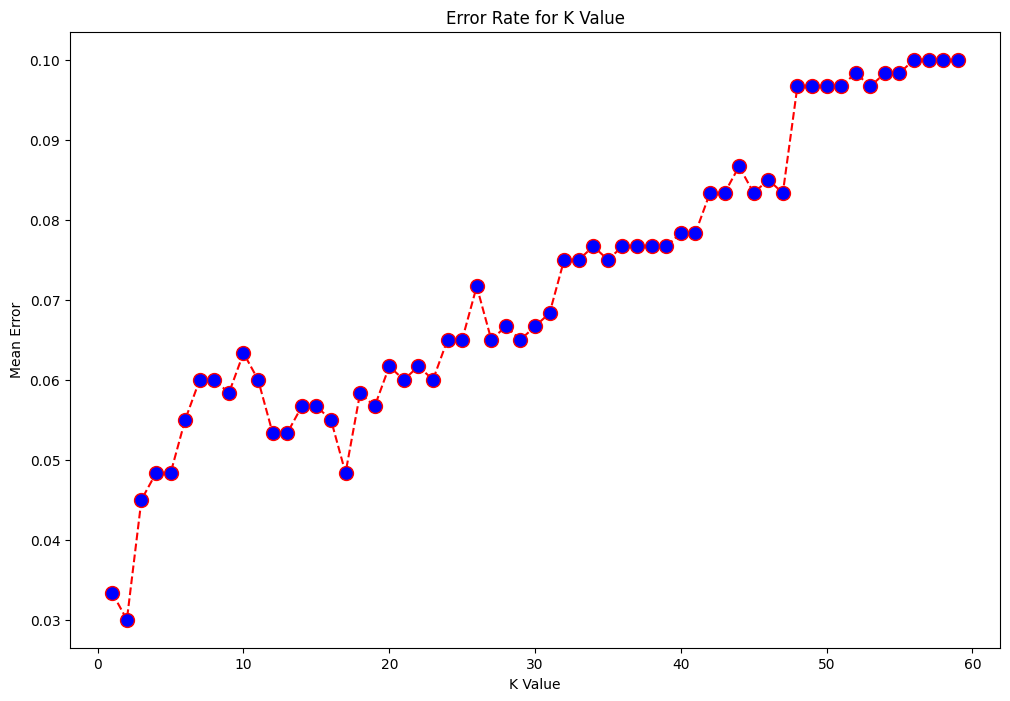

In [101]:
plt.figure(figsize=(12,8))
plt.plot(range(1,60), error, color="red", linestyle="dashed",
        marker="o",markerfacecolor="blue",markersize=10)
plt.title("Error Rate for K Value")
plt.xlabel("K Value") 
plt.ylabel("Mean Error")

In [102]:
k = np.arange(1,60,2)
params = {"n_neighbors" : k}
random_search = RandomizedSearchCV(KNeighborsClassifier(), params, n_iter=5, cv=5, n_jobs=-1, verbose=0)
random_search .fit(X_train_dtm, y_train)
print("train score - " + str(random_search .score(X_train_dtm, y_train)))
print("test score - " + str(random_search .score(X_test_dtm, y_test)))

train score - 0.9365874009178139
test score - 0.9416666666666667


In [103]:
print(random_search.best_params_)

{'n_neighbors': 9}
